In [8]:
import pandas as pd

In [9]:
df_reviews = pd.read_csv('IMDB Dataset.csv')
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [10]:
df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [11]:
print(df_positive.value_counts('sentiment'))
print(df_negative.value_counts('sentiment'))

sentiment
positive    9000
Name: count, dtype: int64
sentiment
negative    1000
Name: count, dtype: int64


In [12]:
# Make imbalanced dataframe

df_reviews_imb = pd.concat([df_positive, df_negative])
df_reviews_imb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


# Deal with imbalanced classes

#### Balancing data with .sample()

<Axes: xlabel='sentiment'>

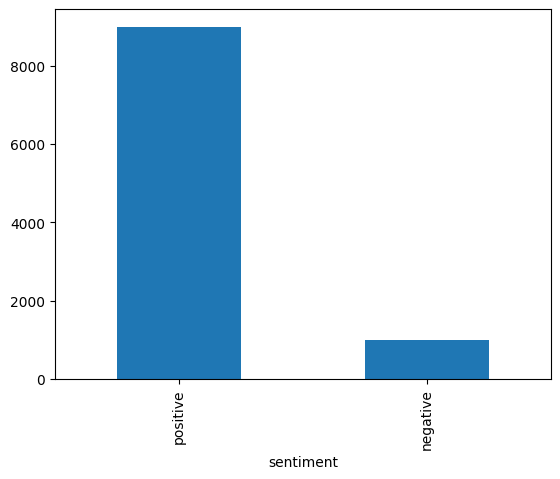

In [13]:
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

In [14]:
len_negative = len(df_negative)

In [15]:
df_undersample_positive = df_positive.sample(n=len_negative)

In [16]:
df_reviews_balanced = pd.concat([df_undersample_positive, df_negative])
df_reviews_balanced

,review,sentiment
7583,This has got to be the funniest movie I have s...,positive
8850,"my girlfriend, as we walk in the cold London e...",positive
7821,definitely needed a little work in season 2. S...,positive
9089,A most awaited film of the year 2002. After th...,positive
17360,Have you heard the story about the reluctant h...,positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [17]:
df_reviews_balanced.reset_index(drop=True, inplace=True)
df_reviews_balanced

,review,sentiment
0,This has got to be the funniest movie I have s...,positive
1,"my girlfriend, as we walk in the cold London e...",positive
2,definitely needed a little work in season 2. S...,positive
3,A most awaited film of the year 2002. After th...,positive
4,Have you heard the story about the reluctant h...,positive
...,...,...
1995,Stranded in Space (1972) MST3K version - a ver...,negative
1996,"I happened to catch this supposed ""horror"" fli...",negative
1997,waste of 1h45 this nasty little film is one to...,negative
1998,Warning: This could spoil your movie. Watch it...,negative


#### Balancing with RandomUnderSampler

In [18]:
from imblearn.under_sampling import RandomUnderSampler  # for under sampling
#from imblearn.under_sampling import RandomOverSampler - for over sampling

In [19]:
random_under_sample = RandomUnderSampler(random_state=0)

In [22]:
df_reviews_bal, df_reviews_bal['sentiment'] = random_under_sample.fit_resample(df_reviews_imb[['review']], df_reviews_imb['sentiment'])
df_reviews_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,Knute Rockne led an extraordinary life and his...,positive
1996,At the height of the 'Celebrity Big Brother' r...,positive
1997,This is another of Robert Altman's underrated ...,positive
1998,This movie won a special award at Cannes for i...,positive


In [23]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64